In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('3_taxi_peru.csv', sep = ';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [4]:
df

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


### 1. Найдем с какой платформы было сделано больше всего заказов. 

In [4]:
df.source.value_counts(normalize=True).mul(100).round(2)

iPhone     42.37
web        33.20
Android    21.35
iPad        2.48
Wap         0.59
Name: source, dtype: float64

In [7]:
orders_df = df.groupby('source', as_index = False)\
.agg({'journey_id': 'count'})\
.sort_values('journey_id', ascending = False)

In [8]:
orders_df

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


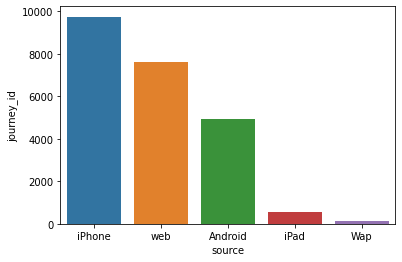

In [10]:
source_barplot = sns.barplot(x="source", y="journey_id", data = orders_df)

### 2. Визуализируем распределение итогового состояния заказа (end_state) в разбивке по платформам

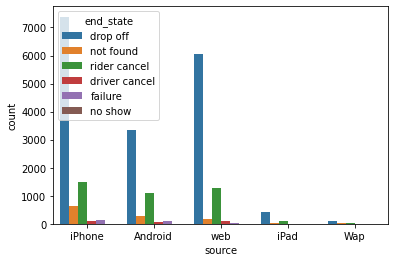

In [11]:
sns.countplot(x='source', hue = 'end_state', data = df)

### 3. Проверим, как распределены оценки водителей

In [19]:
driver_score_counts = df \
                        .driver_score \
                        .value_counts(normalize=True) \
                        .mul(100) \
                        .round(2) \
                        .reset_index() \
                        .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
                        .sort_values('driver_score', ascending=True)

In [20]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


### 4. Распределение оценок клиентов

In [15]:
rider_score_counts = df.rider_score\
                        .value_counts(normalize=True)\
                        .mul(100)\
                        .round(2)\
                        .reset_index()\
                        .rename(columns={'index':'rider_score', 'rider_score':'percentage'})\
                        .sort_values('rider_score', ascending=True)

In [16]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


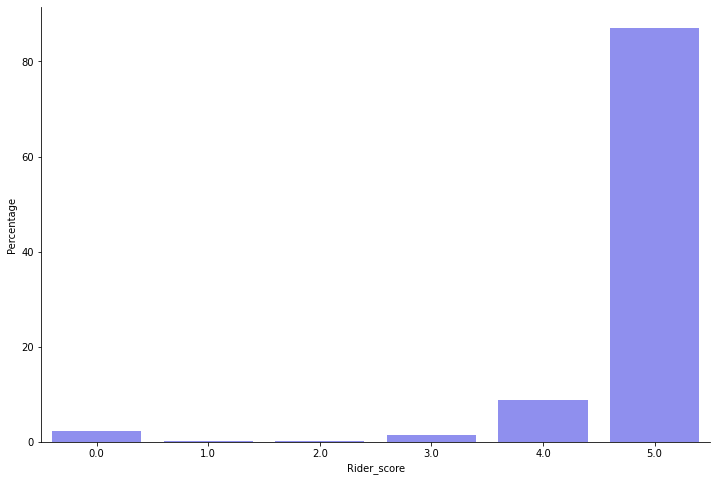

In [21]:
plt.figure(figsize=[12, 8])
ax = sns.barplot(x='rider_score', y='percentage',
                 data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider_score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

### 5. В чем отличие распределения оценок клиентов от распределения оценок водителей?

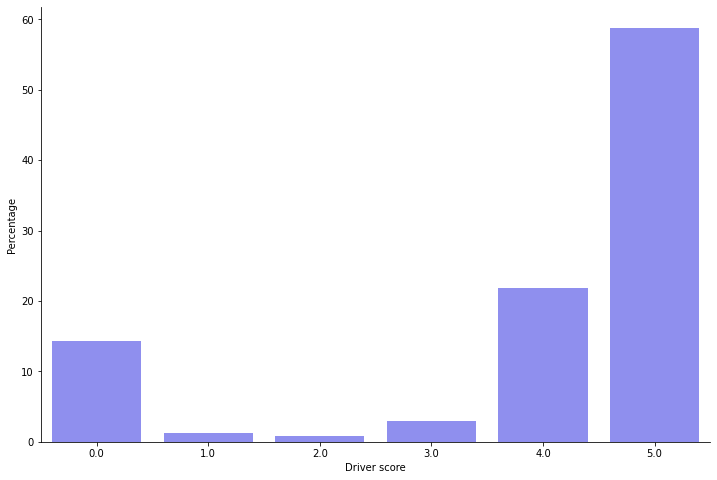

In [22]:
plt.figure(figsize=[12, 8])
ax = sns.barplot(x='driver_score', y='percentage',
                 data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()
plt.show()

#### Особенности оценок водителей и клиентов
- Более чем в 80% случаев водители поставили клиентам 5 звездочек
- Клиенты более гибко оценивают водителей
- Водители ставят меньше 0, чем клиенты

### 6 Найдем водителей, которые опаздывали на заказы к определенному времени (start_type == 'reserved')

In [8]:
taxi = pd.read_csv('3_taxi_peru.csv',sep = ';',parse_dates=["start_at", "end_at", "arrived_at"]) 
taxi = taxi.query('start_type =="asap" or start_type =="reserved"')

In [9]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [10]:
bad_drivers = taxi.query("start_type == 'reserved' and wait_time > 0.0" ) \
.groupby("driver_id")\
.agg({"taxi_id" : "count"})\
.rename (columns = {"taxi_id" : 'late_number'})\
.sort_values('late_number', ascending = False)

In [11]:
bad_drivers

,late_number
driver_id,
406921adcca37705ef527b4246c0cfea,67
d665fb9f75ef5d9cd0fd89479380ba78,59
ec84a73745199ff840ecafcb924383ad,57
56f59b58bcbbd1cdabc3652e713134c2,51
c814db2127582cf95dea1f74f43127c2,45
...,...
d7bf644eb441cda6127f91addebb85c4,1
b68895736389f2949faa8c73555b81ac,1
8cb98e46b27af1e6fca8768a2a6329f3,1


### 7 В какой месяц и в какой день недели поступает меньше всего заказов?

In [24]:
taxi['month'] = taxi.start_at.dt.month 

taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


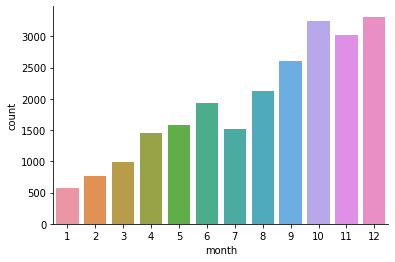

In [26]:
sns.countplot(taxi.month)
sns.despine()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


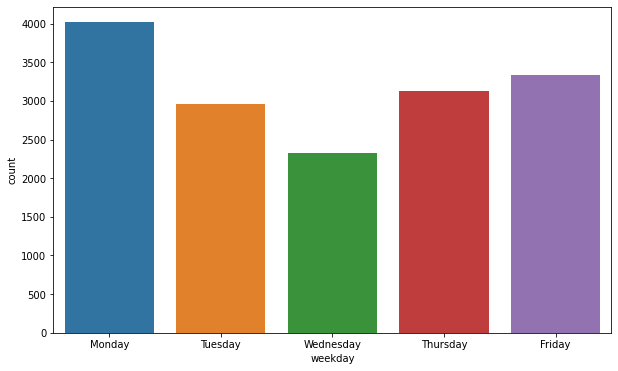

In [36]:
plt.figure(figsize =(10,6))
sns.countplot(taxi.weekday, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

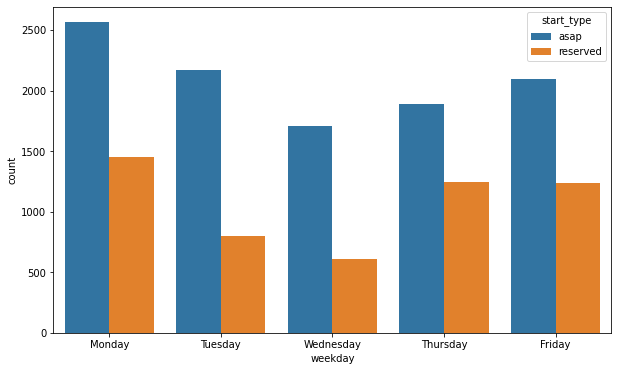

In [30]:
# заказы по дням недели с разбивкой по типу заказа такси ("на точное время" или "срочно")
plt.figure(figsize =(10,6))
sns.countplot("weekday",
              data = taxi, 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
              hue = 'start_type')

### 8 Посчитаем метрику MAU (число уникальных пользователей за месяц)

In [34]:
taxi.weekday

0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
23106    Saturday
23107    Saturday
23108     Tuesday
23109    Thursday
23110     Tuesday
Name: weekday, Length: 23091, dtype: object

In [37]:
xticks = range(1, 13)
mau = (
    taxi.groupby('month')
    .agg({"user_id" : pd.Series.nunique})
)

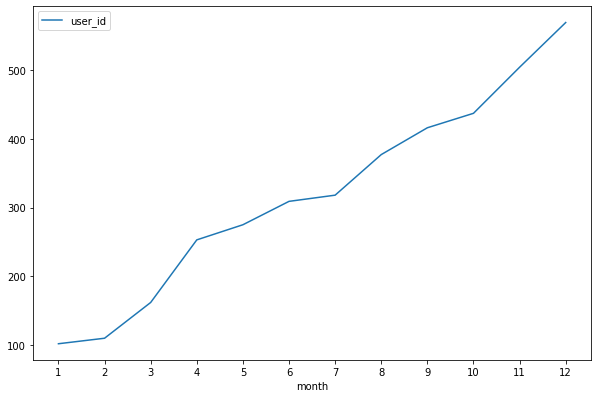

In [38]:
plt.figure(figsize = (10, 6.5))
sns.lineplot(data = mau)
plt.xticks(xticks);
#mau.plot()